In [1]:
%config Completer.use_jedi = False

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from enm.Enm import Enm, rewire_network
from enm.utils import *
import pickle
import random
random.seed(4812)        # or any integer
np.random.seed(4813)

In [5]:
# with open('../data/interim/pcc.pickle', 'rb') as f:
#     enm_ee = pickle.load(f)

In [6]:
strain_ids =pd.read_csv('../data/interim/strain_ids.csv')

In [4]:
e = Enm('rew')

In [5]:
e.read_network('../data/interim/costanzo_pcc_ALL',sep=',')

In [6]:
gc_rew = rewire_network(e.graph_gc)
e_rew = Enm('rewired')
e_rew.G=gc_rew
e_rew.giant_component()
e_rew.gnm_analysis()
e_rew.df = pd.merge(e_rew.df,strain_ids, left_on='orf_name',right_on='gene1')
e_rew.get_sensor_effector(True)

In [7]:
goea, geneid2name,a = create_goea(gaf='../data/raw/ontology/sgd.gaf', obo='../data/raw/ontology/go-basic.obo',background='../data/interim/go_background_list',
                               sdg_info_tab='../data/raw/ontology/SGD_features.tab')

../data/raw/ontology/go-basic.obo: fmt(1.2) rel(2021-05-01) 47,284 GO Terms; optional_attrs(relationship)
HMS:0:00:01.220224  41,910 annotations READ: ../data/raw/ontology/sgd.gaf BP

Load BP Gene Ontology Analysis ...
Propagating term counts up: is_a and negatively_regulates part_of positively_regulates regulates


46 GO IDs NOT FOUND IN ASSOCIATION: GO:0090203 GO:0097236 GO:1902352 GO:0055114 GO:0018192 GO:0035955 GO:1903474 GO:1900524 GO:0035952 GO:1900062 GO:1900472 GO:1990872 GO:0001324 GO:0035392 GO:0010978 GO:0001302 GO:1900526 GO:0090579 GO:0061392 GO:0051188 GO:1900465 GO:1900008 GO:0061404 GO:0090202 GO:0009108 GO:0035969 GO:1900525 GO:0001300 GO:0061416 GO:0048310 GO:1902353 GO:0071733 GO:1900473 GO:0034225 GO:0000733 GO:1900462 GO:0001320 GO:1900466 GO:0061393 GO:0001308 GO:0061427 GO:0035961 GO:0072363 GO:0072321 GO:0018065 GO:0001319


 82%  4,649 of  5,672 population items found in association


In [21]:
e_rew.analyze_components_biology(goea, geneid2name,True)
e_rew.analyze_components_biology(goea, geneid2name,False)

/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/oma21/enm_package/enm/Enm.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 


Run BP Gene Ontology Analysis: current study set of 41 IDs ... 93%     38 of     41 study items found in association
100%     41 of     41 study items found in population(5672)
Calculating 4,999 uncorrected p-values using fisher
   4,999 GO terms are associated with  4,623 of  5,672 population items
     656 GO terms are associated with     38 of     41 study items


Generate p-value distribution for FDR based on resampling (this might take a while)
Sample 0 / 500: p-value 0.004065631037797406
Sample 10 / 500: p-value 0.0003541013658244144
Sample 20 / 500: p-value 0.0010463955908925915
Sample 30 / 500: p-value 0.0006386546675332443
Sample 40 / 500: p-value 0.007228490832208765
Sample 50 / 500: p-value 0.002297091750737129
Sample 60 / 500: p-value 0.0020425048918832427
Sample 70 / 500: p-value 0.0002653582572234071
Sample 80 / 500: p-value 0.003638547241406018
Sample 90 / 500: p-value 0.0017774476141511261
Sample 100 / 500: p-value 0.007228490832208765
Sample 110 / 500: p-value 0.0005328429826981402
Sample 120 / 500: p-value 0.0016097484835507288
Sample 130 / 500: p-value 0.0010463955908925915
Sample 140 / 500: p-value 0.007228490832208765
Sample 150 / 500: p-value 0.0010463955908925915
Sample 160 / 500: p-value 0.007228490832208765
Sample 170 / 500: p-value 0.0010463955908925915
Sample 180 / 500: p-value 0.0013694242372153194
Sample 190 / 500: p-va

  METHOD fdr:
      25 GO terms found significant (< 0.1=alpha) ( 25 enriched +   0 purified): local fdr
      26 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


/home/oma21/enm_package/enm/Enm.py:248: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['go_group'] = None
/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [70]:
e_rew.get_sensor_effector()

In [22]:
sensors_pcc = e_rew.sensors_df

In [74]:
pos = e_rew.graph_gc.nodes('pos')

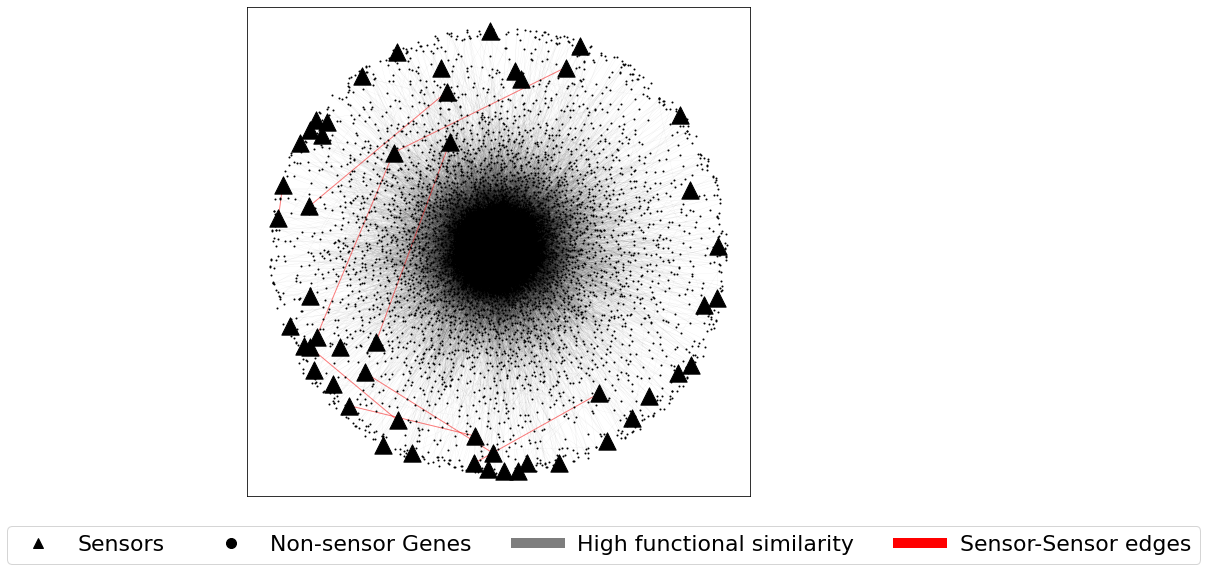

In [88]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(9,9))
#axs = ax.ravel()
legend_elements = [    ]

#for i in range(len(sensor_order)):
e_rew.plot_network_spring(ax=ax,
                          node_size=1,
                          node_color='black',
 #                        node_size = [100 if i in sensors_pcc.orf_name.values or i in effector_pcc.orf_name.values else 1 for i in e_pcc.nodes],
                         #node_color = ['red' if i in sensors_pcc.orf_name.values else 'blue' if i in effector_pcc.orf_name.values else 'black' for i in e_pcc.nodes],
                         edge_color='black',savefig=False)
    #                         node_shape=['^' if i in sensors_pcc.orf_name.values else 'v' if i in effector_pcc.orf_name.values else 'o' for i in e_pcc.nodes])
    # nx.draw_networkx_nodes(e_pcc.graph_gc, nodelist=sensors_pcc.orf_name.values, node_size=200, pos=pos,
    #                           node_color='black',
    #                           node_shape='^',edgecolors='black',
    #                           linewidths=1)
nx.draw_networkx_nodes(nx.induced_subgraph(e_rew.graph_gc, sensors_pcc.orf_name.tolist()),
                       pos=pos, 
                       node_color='black', alpha=1, node_shape='^')

# for itr, i in enumerate(sensor_order):
#     #print(i, effector_colors[itr])

#     orf_names_to_plot = sensors_pcc.loc[sensors_pcc.go_group==i, 'orf_name'].tolist()
#     nx.draw_networkx_nodes(e_rew.graph_gc, nodelist=orf_names_to_plot, node_size=200, pos=pos,
#                           node_color=sensor_colors[itr],
#                           node_shape='^',edgecolors='black',
#                           linewidths=1)
#     legend_elements.append(
#         Line2D([0], [0], marker='^', color='black', label=f'{i}',
#                               markerfacecolor=sensor_colors[itr], markersize=30, linestyle="None")
#     )
ax.set_facecolor('white')
# legend_elements.append(
#         Line2D([0], [0], marker='^', color='black', label=f'No GO Enrichment',
#                               markerfacecolor='black', markersize=30, linestyle="None")
#     )
legend_elements.extend(
    [Line2D([0], [0], marker='^', color='black', label='Sensors',
                              markerfacecolor='black', markersize=10, linestyle="None"),
     Line2D([0], [0], marker='o', color='black', label='Non-sensor Genes',
                              markerfacecolor='black', markersize=10, linestyle="None"),
#                    Line2D([0], [0], marker='o', color='black', label='Effectors',
#                               markerfacecolor='black', markersize=10, linestyle="None"),
                   
                       Line2D([0], [0], marker='o', color='black', label= 'High functional similarity',
                              markerfacecolor='black', markersize=0, linestyle="-", alpha=0.5, lw=10),
                   Line2D([0], [0], marker='o', color='red', label= 'Sensor-Sensor edges',
                              markerfacecolor='#018571', markersize=0, linestyle="-",lw=10)
                   #Line2D([0], [0], marker='o', color='blue', label= 'Effector-Effector edges',
    #                          markerfacecolor='#a6611a', markersize=0, linestyle="-")
    ]
)
lgd = ax.legend(handles=legend_elements, fontsize=22,loc='center left', bbox_to_anchor=(-0.5, -0.1),ncol=5)
nx.draw_networkx_edges(nx.induced_subgraph(e_rew.graph_gc, sensors_pcc.orf_name.tolist()),pos=pos, edge_color='red', alpha=0.5)
plt.savefig(f'../reports/figures/paper_figures_supp/figs1.png',bbox_inches='tight',dpi=150)

# Calculate number of clusters in rewired

In [8]:
with open('../data/supp/pcc.pickle','rb') as f:
    e_pcc = pickle.load(f)

In [ ]:
e_pcc.simulate_rewire(sim_num = 500)

0


@> 5182 modes were calculated in 26.99s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


1


@> 5182 modes were calculated in 33.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.6s.


2


@> 5182 modes were calculated in 32.55s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


3


@> 5182 modes were calculated in 36.55s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


4


@> 5182 modes were calculated in 32.99s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


5


@> 5182 modes were calculated in 37.45s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.3s.


6


@> 5182 modes were calculated in 29.68s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.3s.


7


@> 5182 modes were calculated in 33.71s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


8


@> 5182 modes were calculated in 31.65s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


9


@> 5182 modes were calculated in 30.04s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


10


@> 5182 modes were calculated in 124.31s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 6.5s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.3s.
@> Perturbation response scanning completed in 9.2s.


11


@> 5182 modes were calculated in 136.54s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 5.1s.


12


@> 5182 modes were calculated in 39.11s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


13


@> 5182 modes were calculated in 31.65s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.9s.


14


@> 5182 modes were calculated in 30.04s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


15


@> 5182 modes were calculated in 30.66s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


16


@> 5182 modes were calculated in 178.51s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 7.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.3s.
@> Perturbation response scanning completed in 11.3s.


17


@> 5182 modes were calculated in 95.97s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 5.1s.


18


@> 5182 modes were calculated in 38.56s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.6s.


19


@> 5182 modes were calculated in 30.49s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


20


@> 5182 modes were calculated in 36.19s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


21


@> 5182 modes were calculated in 35.34s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.6s.


22


@> 5182 modes were calculated in 32.33s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


23


@> 5182 modes were calculated in 194.39s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 4.3s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 5.9s.


24


@> 5182 modes were calculated in 152.15s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.6s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.8s.


25


@> 5182 modes were calculated in 32.29s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


26


@> 5182 modes were calculated in 30.56s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


27


@> 5182 modes were calculated in 32.38s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


28


@> 5182 modes were calculated in 30.65s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 3.9s.


29


@> 5182 modes were calculated in 163.90s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 4.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 5.7s.


30


@> 5182 modes were calculated in 70.56s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.7s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.9s.


31


@> 5182 modes were calculated in 35.21s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


32


@> 5182 modes were calculated in 33.66s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.6s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.8s.


33


@> 5182 modes were calculated in 34.03s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


34


@> 5182 modes were calculated in 35.32s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


35


@> 5182 modes were calculated in 33.91s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


36


@> 5182 modes were calculated in 31.72s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


37


@> 5182 modes were calculated in 32.89s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


38


@> 5182 modes were calculated in 31.93s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


39


@> 5182 modes were calculated in 31.47s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


40


@> 5182 modes were calculated in 32.17s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.1s.


41


@> 5182 modes were calculated in 32.23s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


42


@> 5182 modes were calculated in 35.50s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


43


@> 5182 modes were calculated in 35.93s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.3s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.8s.


44


@> 5182 modes were calculated in 36.12s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


45


@> 5182 modes were calculated in 32.27s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


46


@> 5182 modes were calculated in 31.88s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


47


@> 5182 modes were calculated in 32.39s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


48


@> 5182 modes were calculated in 32.25s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


49


@> 5182 modes were calculated in 31.74s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


50


@> 5182 modes were calculated in 34.39s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.3s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.7s.


51


@> 5182 modes were calculated in 34.55s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.6s.


52


@> 5182 modes were calculated in 33.58s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


53


@> 5182 modes were calculated in 32.75s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.6s.


54


@> 5182 modes were calculated in 35.54s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.2s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.6s.


55


@> 5182 modes were calculated in 35.64s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


56


@> 5182 modes were calculated in 35.12s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


57


@> 5182 modes were calculated in 33.92s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.5s.


58


@> 5182 modes were calculated in 32.17s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.4s.


59


@> 5182 modes were calculated in 33.38s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


60


@> 5182 modes were calculated in 32.58s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.4s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.7s.


61


@> 5182 modes were calculated in 32.87s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


62


@> 5182 modes were calculated in 32.43s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


63


@> 5182 modes were calculated in 32.91s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.3s.


64


@> 5182 modes were calculated in 32.57s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


65


@> 5182 modes were calculated in 33.66s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


66


@> 5182 modes were calculated in 32.84s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.7s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


67


@> 5182 modes were calculated in 32.73s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.8s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.3s.


68


@> 5182 modes were calculated in 33.12s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


69


@> 5182 modes were calculated in 31.95s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


70


@> 5182 modes were calculated in 32.33s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.3s.


71


@> 5182 modes were calculated in 33.94s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


72


@> 5182 modes were calculated in 32.21s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


73


@> 5182 modes were calculated in 32.72s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.4s.


74


@> 5182 modes were calculated in 32.70s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.3s.


75


@> 5182 modes were calculated in 32.41s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.1s.


76


@> 5182 modes were calculated in 33.73s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.2s.


77


@> 5182 modes were calculated in 32.41s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


78


@> 5182 modes were calculated in 34.42s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.2s.


79


@> 5182 modes were calculated in 32.07s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.4s.


80


@> 5182 modes were calculated in 32.70s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.2s.
@> Perturbation response scanning completed in 4.4s.


81


@> 5182 modes were calculated in 35.04s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 3.1s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.5s.


82


@> 5182 modes were calculated in 31.25s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 2.9s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.1s.
@> Perturbation response scanning completed in 4.0s.


83


In [ ]:
for i in e_pcc.e_list:
    i.df = pd.merge(i.df , strain_ids , left_on = 'orf_name', right_on='gene1')
    i.get_sensor_effector()
    i.analyze_components_biology(goea, geneid2name)

In [ ]:
def save_rewired_data(e_pcc, idx, path):
    e = e_pcc.e_list[idx]
    df_rew = e.df
    sensors_df_rew = e.sensors_df
    effectors_df_rew = e.effectors_df
    g = e.graph_gc
    MYDIR = (f"{path}/{idx}")
    CHECK_FOLDER = os.path.isdir(MYDIR)

    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")
    df_rew.to_csv(f"{path}/{idx}/df_rew_{idx}.csv",index=False)
    sensors_df_rew.to_csv(f"{path}/{idx}/sensors_df_rew_{idx}.csv",index=False)
    effectors_df_rew.to_csv(f"{path}/{idx}/effectors_df_rew_{idx}.csv",index=False)
    nx.write_edgelist(g, f"{path}/{idx}/g_rew_{idx}.edgelist.gz")

In [16]:
[save_rewired_data(e_pcc,i,'../data/interim/rewired_data500') for i in range(500)]

created folder :  ../data/interim/rewired_data500/0
created folder :  ../data/interim/rewired_data500/1
created folder :  ../data/interim/rewired_data500/2
created folder :  ../data/interim/rewired_data500/3
created folder :  ../data/interim/rewired_data500/4
created folder :  ../data/interim/rewired_data500/5
created folder :  ../data/interim/rewired_data500/6
created folder :  ../data/interim/rewired_data500/7
created folder :  ../data/interim/rewired_data500/8
created folder :  ../data/interim/rewired_data500/9
created folder :  ../data/interim/rewired_data500/10
created folder :  ../data/interim/rewired_data500/11
created folder :  ../data/interim/rewired_data500/12
created folder :  ../data/interim/rewired_data500/13
created folder :  ../data/interim/rewired_data500/14
created folder :  ../data/interim/rewired_data500/15
created folder :  ../data/interim/rewired_data500/16
created folder :  ../data/interim/rewired_data500/17
created folder :  ../data/interim/rewired_data500/18
cre

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
import glob

sensors_fls = glob.glob('../data/interim/rewired_data500/sensors_df_rew*')

In [11]:
sensors_fls

[]

In [21]:
sensors_df_rew = pd.concat([pd.read_csv(f'../data/interim/rewired_data500/{idx}/sensors_df_rew_{idx}.csv') for idx in range(500)],keys=range(500)).reset_index(level=0)

In [48]:
res = sensors_df_rew.groupby('level_0')['sensor_cluster'].nunique()
res2 = sensors_df_rew.groupby('level_0')['go_group'].nunique()

In [18]:
#res = [i.sensors_df.dropna(subset=['sensor_cluster']).sensor_cluster.nunique() for i in e_pcc.e_list]
#res2 = [i.sensors_df.dropna(subset=['go_group']).go_group.nunique() for i in e_pcc.e_list]

In [49]:
idxx = np.argwhere(np.array(res)>0).reshape(1,-1)[0]
idxx2 = np.argwhere(np.array(res2)>0).reshape(1,-1)[0]

In [50]:
len(idxx)

68

In [51]:
len(idxx)/len(res)

0.136

In [53]:
len(idxx2)/len(res2)

0.034

In [54]:
len(idxx2)/len(idxx)

0.25

In [27]:
def plot_sensors(e_pcc,idx):
    e =e_pcc.e_list[idx]
    sub_orfs =  e.sensors_df.dropna(subset=['sensor_cluster']).orf_name.tolist()
    g = e.graph_gc
    induced_g = nx.induced_subgraph(g,sub_orfs)
    sub_nw = get_subnetwork(g, sub_orfs, radius= 1)
    pos_sub = nx.spring_layout(sub_nw)
    fig, ax_ = plt.subplots() 
    nx.draw_networkx_nodes(sub_nw,ax=ax_, pos = pos_sub, node_color = ['none' if i in sub_orfs else 'k' for i in sub_nw.nodes])
    nx.draw_networkx_nodes(nx.induced_subgraph(sub_nw, sub_orfs), pos=pos_sub, node_shape='^', node_color='black')
    nx.draw_networkx_edges(sub_nw,ax=ax_, pos = pos_sub)
    nx.draw_networkx_edges(nx.induced_subgraph(sub_nw, sub_orfs), pos=pos_sub, edge_color='red')
    plt.show()
    #nx.draw_networkx(sub_nw)

25


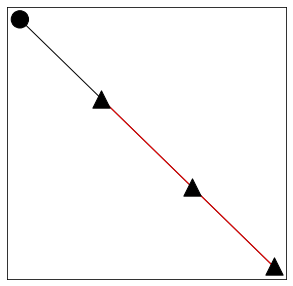

30


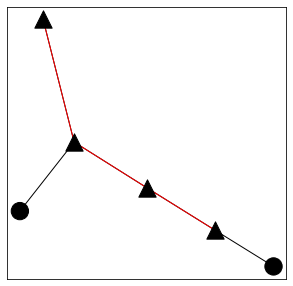

45


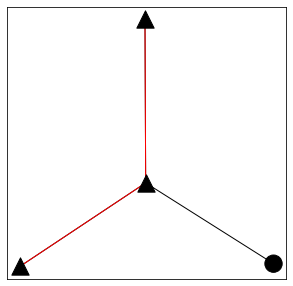

53


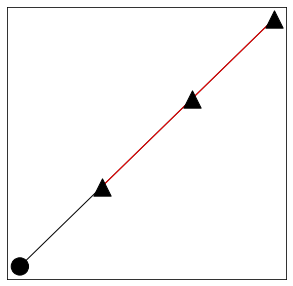

54


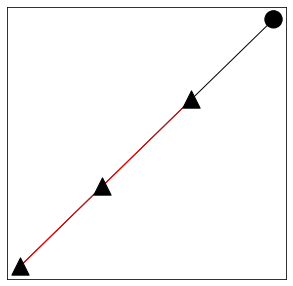

60


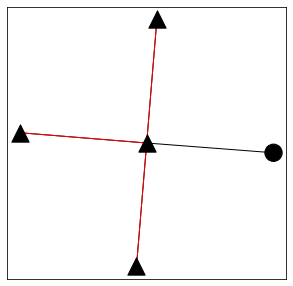

65


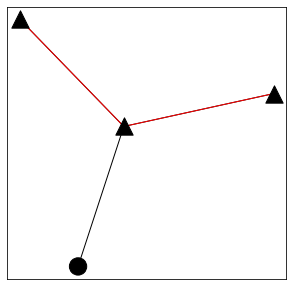

67


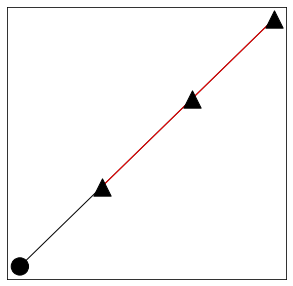

71


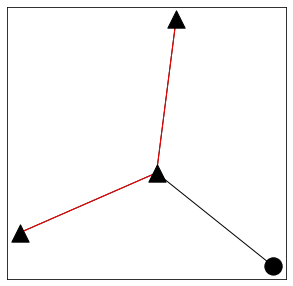

72


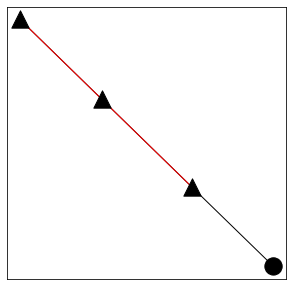

75


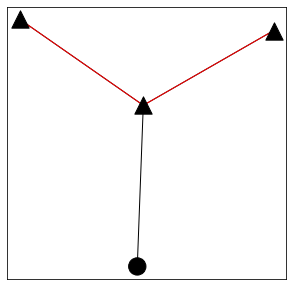

79


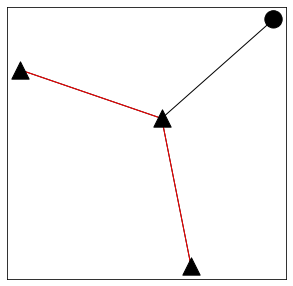

80


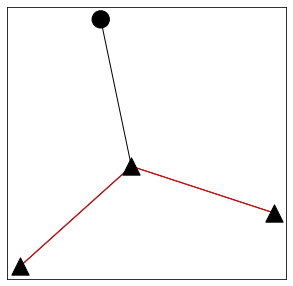

82


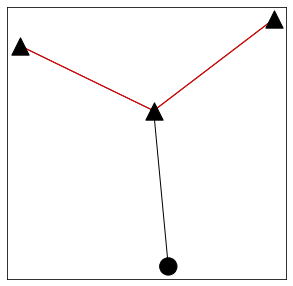

103


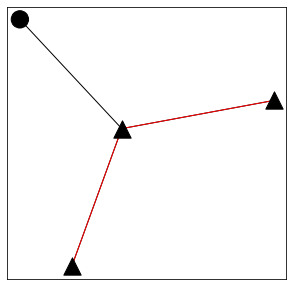

122


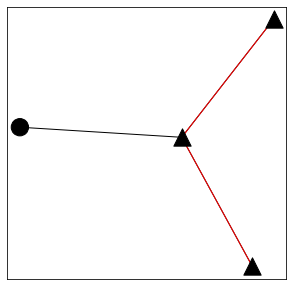

128


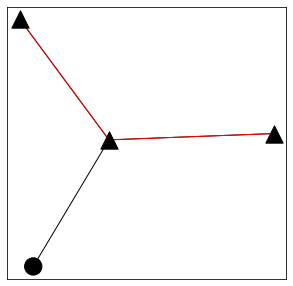

132


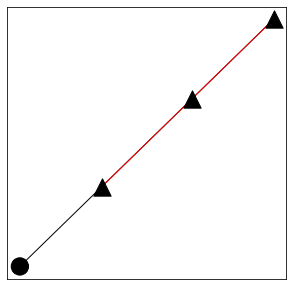

139


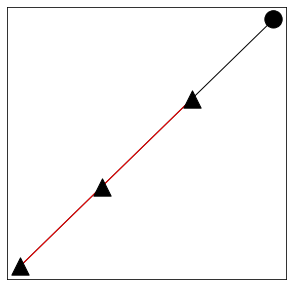

142


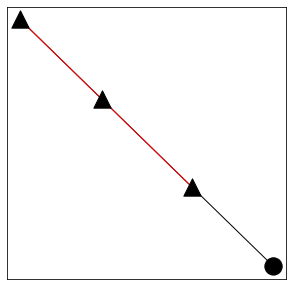

151


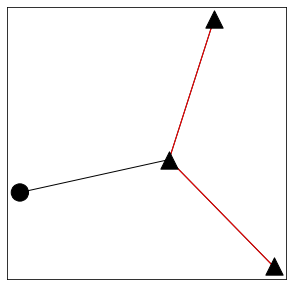

155


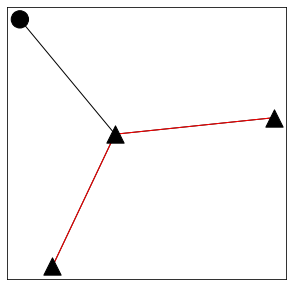

160


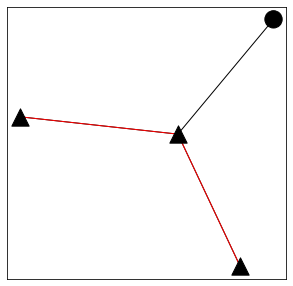

163


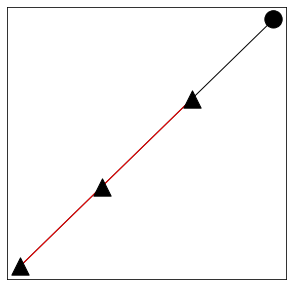

177


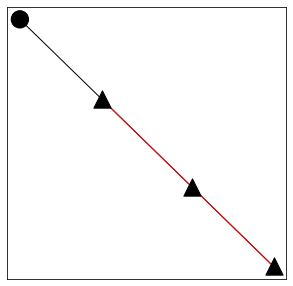

179


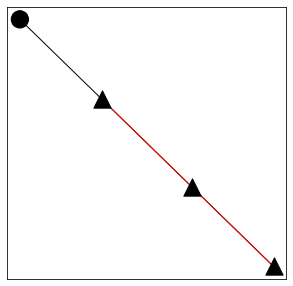

184


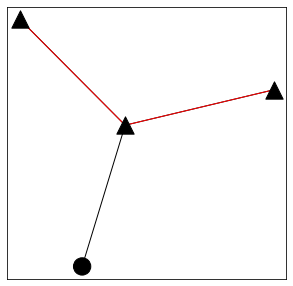

187


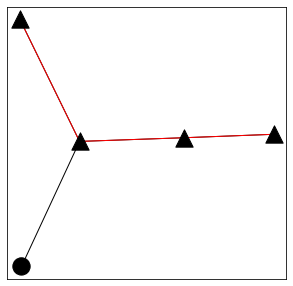

219


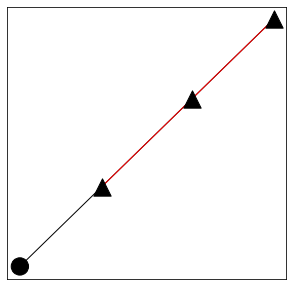

222


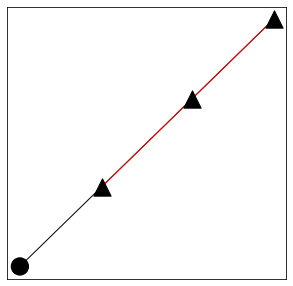

230


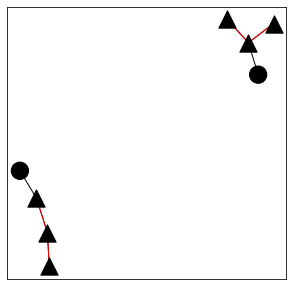

238


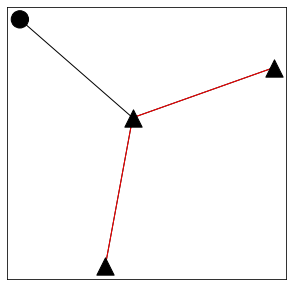

240


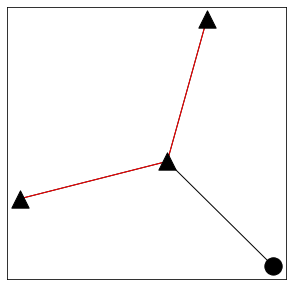

245


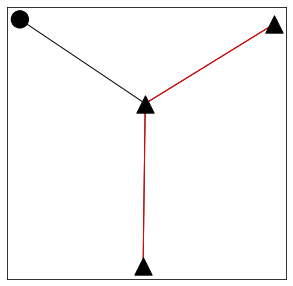

254


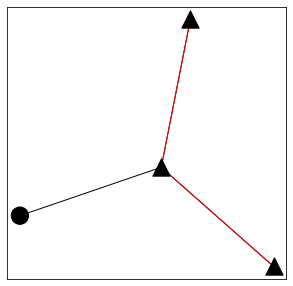

261


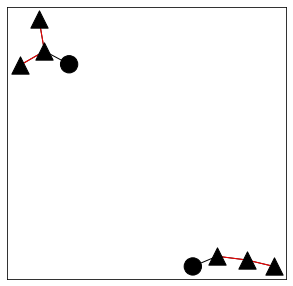

273


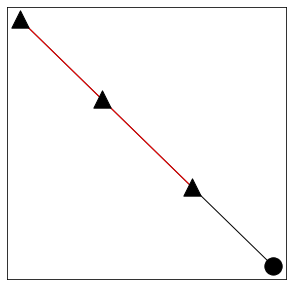

280


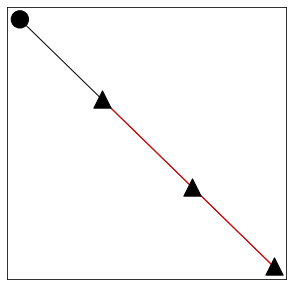

286


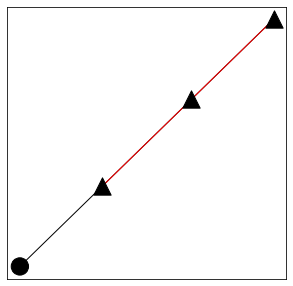

296


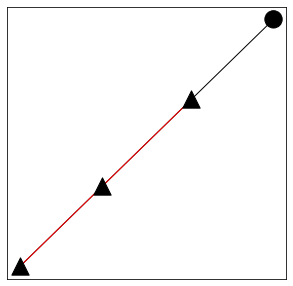

304


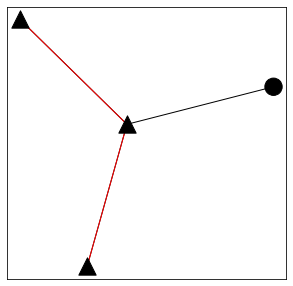

307


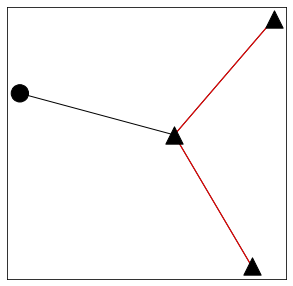

317


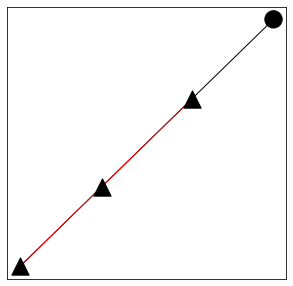

323


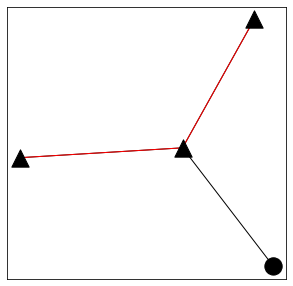

330


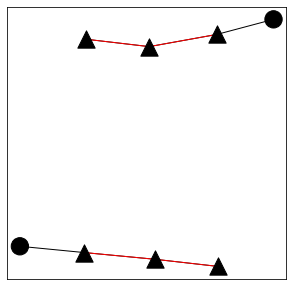

332


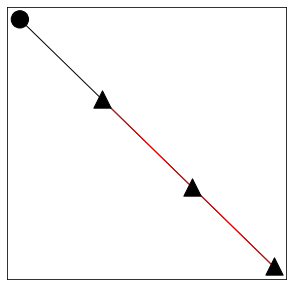

333


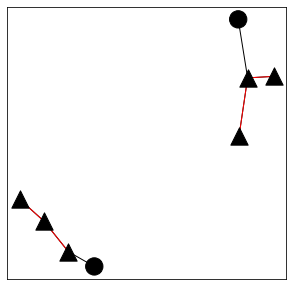

349


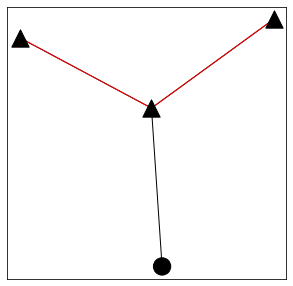

354


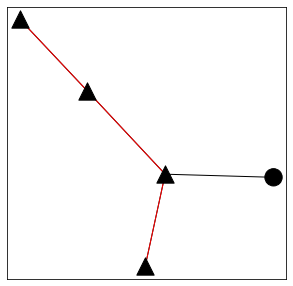

356


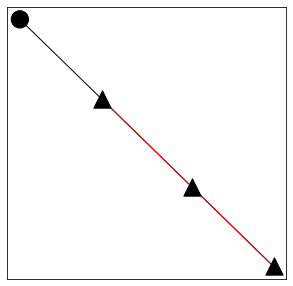

361


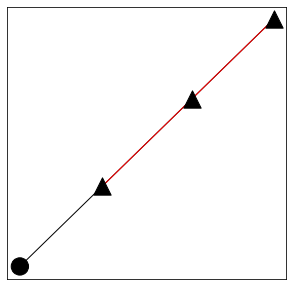

366


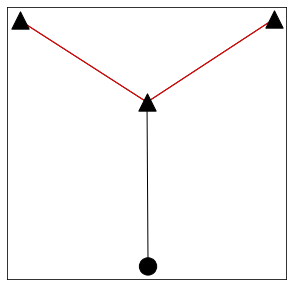

373


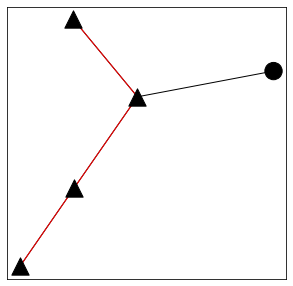

383


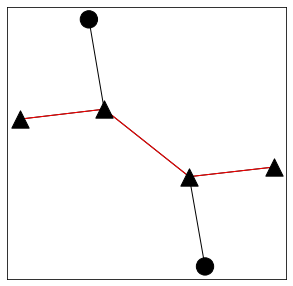

390


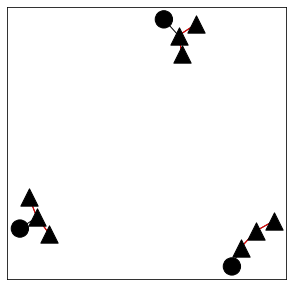

398


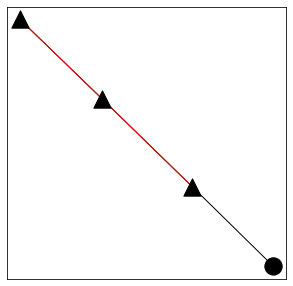

405


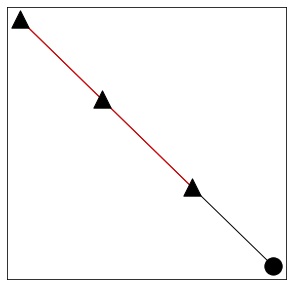

416


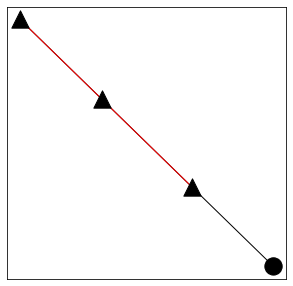

431


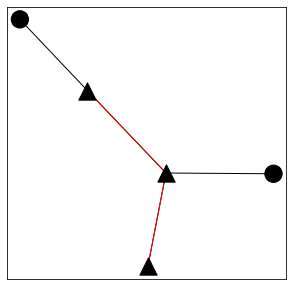

442


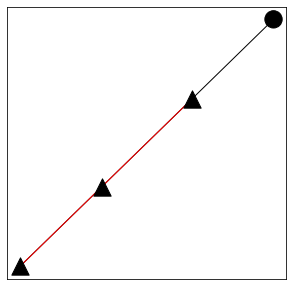

445


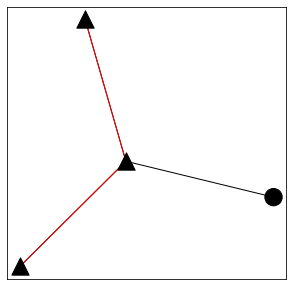

466


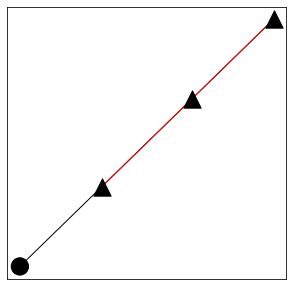

468


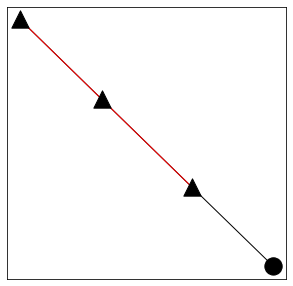

473


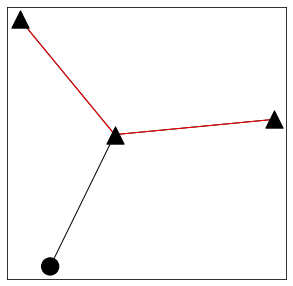

474


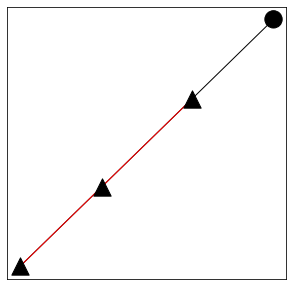

475


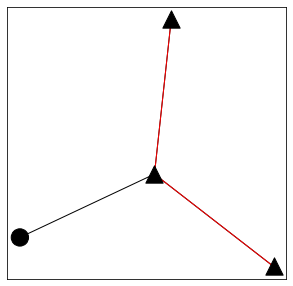

485


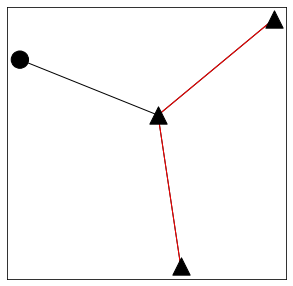

493


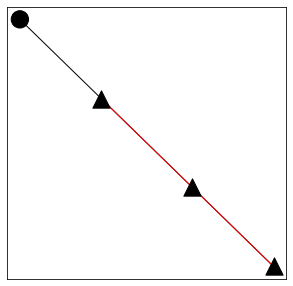

In [28]:
for i in idxx:
    print(i)
    plot_sensors(e_pcc,i)

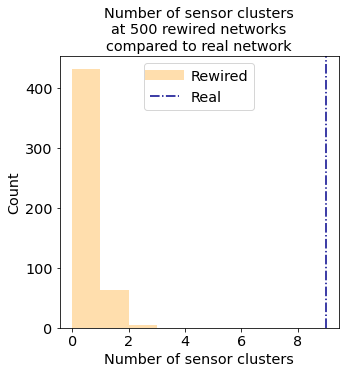

In [56]:
fig, ax =plt.subplots(figsize=(5,5))
ax.hist(res,3,color='navajowhite')
ax.set_xlabel('Number of sensor clusters')
ax.set_ylabel('Count')
ax.set_title('Number of sensor clusters\nat 500 rewired networks\ncompared to real network')
ax.axvline(9,c='darkblue',linestyle='-.')
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

fig.savefig('../reports/figures/paper_figures_supp/rewired_sensor_count.png', bbox_inches='tight',dpi=150)

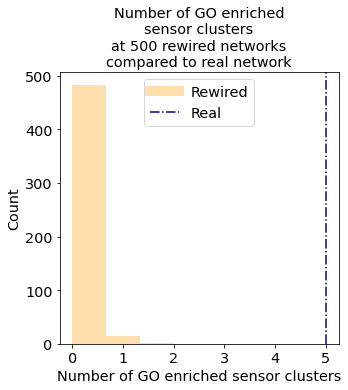

In [57]:
fig, ax =plt.subplots(figsize=(5,5))
ax.hist(sensors_df_rew.groupby('level_0')['go_group'].nunique(),3,color='navajowhite')
ax.set_xlabel('Number of GO enriched sensor clusters')
ax.set_ylabel('Count')
ax.set_title('Number of GO enriched\nsensor clusters\nat 500 rewired networks\ncompared to real network')
ax.axvline(5,c='darkblue',linestyle='-.')
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

fig.savefig('../reports/figures/paper_figures_supp/rewired_go_sensor_count.png', bbox_inches='tight',dpi=150)

In [33]:
res

level_0
25     1
30     1
45     1
53     1
54     1
      ..
473    1
474    1
475    1
485    1
493    1
Name: sensor_cluster, Length: 68, dtype: int64

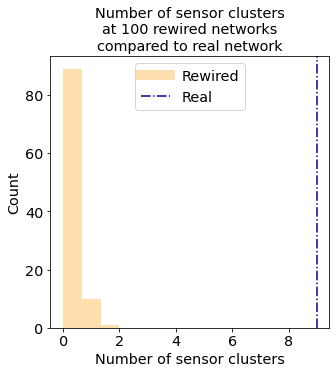

In [176]:
fig, ax =plt.subplots(figsize=(5,5))
ax.hist(res,3,color='navajowhite')
ax.set_xlabel('Number of sensor clusters')
ax.set_ylabel('Count')
ax.set_title('Number of sensor clusters\nat 100 rewired networks\ncompared to real network')
ax.axvline(9,c='darkblue',linestyle='-.')
plt.legend(handles = [
    Line2D([0],[0],color='navajowhite',linewidth=10,label='Rewired'),
    Line2D([0],[0],color='darkblue',linestyle='-.', label='Real')
], loc='upper center')

fig.savefig('../reports/figures/paper_figures_supp/rewired_sensor_count.png', bbox_inches='tight',dpi=150)